In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import os

import librosa
import librosa.display

import IPython

from IPython.display import Audio

from sklearn.model_selection import train_test_split

In [2]:
plt.ioff();

In [5]:
meta_data = pd.read_csv('Source/UrbanSound8K/metadata/UrbanSound8K.csv')

In [43]:
train_meta_data, test_meta_data = train_test_split(meta_data, test_size=0.25\
                                                   ,random_state=42, stratify=meta_data['classID'])

In [44]:
# Save training data spectograms

for idx, row in train_meta_data.iterrows():
    
    path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(row['fold'], row['slice_file_name'])
    
    y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
    if y.shape != (88200,):
        y = np.resize(y, 88200)
    
    
    # Create Matplotlib Image
    fig, ax = plt.subplots()
    
    S = librosa.feature.melspectrogram(y=y, sr=sr,)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
    
    img = librosa.display.specshow(S_db_mel, x_axis='time' , y_axis='log', ax = ax)
    plt.axis('off')    
    
    
    # Save the Spectogram Image
    my_path = 'Data/'
    file_name = row['slice_file_name'][:-4]

    training_path = 'mel_train/{}/'.format(row['classID'])
        
    if not os.path.isdir(my_path + training_path):
        os.makedirs(my_path + training_path)
        
    plt.savefig(my_path + training_path + file_name)
    
    plt.close()

In [45]:
# Save training data spectograms

for idx, row in test_meta_data.iterrows():
    
    path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(row['fold'], row['slice_file_name'])
    
    y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
    if y.shape != (88200,):
        y = np.resize(y, 88200)
    
    
    # Create Matplotlib Image
    fig, ax = plt.subplots()
    
    S = librosa.feature.melspectrogram(y=y, sr=sr,)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)
    
    img = librosa.display.specshow(S_db_mel, x_axis='time' , y_axis='log', ax = ax)
    plt.axis('off')    
    
    
    # Save the Spectogram Image
    my_path = 'Data/'
    file_name = row['slice_file_name'][:-4]

    testing_path = 'mel_test/{}/'.format(row['classID'])
        
    if not os.path.isdir(my_path + testing_path):
        os.makedirs(my_path + testing_path)
        
    plt.savefig(my_path + testing_path + file_name)
    
    plt.close()

In [29]:
train_meta_data.head(40)

,slice_file_name,fsID,start,end,salience,fold,classID,class
7990,77751-4-1-0.wav,77751,7.339391,11.339391,1,2,4,drilling
3702,175845-1-0-0.wav,175845,1.667248,2.405537,1,1,1,car_horn
1749,144351-4-0-0.wav,144351,0.802028,4.802028,1,4,4,drilling
5722,23219-5-0-10.wav,23219,7.127165,11.127165,1,5,5,engine_idling
1548,137815-4-0-8.wav,137815,4.206472,8.206472,1,9,4,drilling
8590,96921-9-0-4.wav,96921,2.000000,6.000000,1,9,9,street_music
3250,167464-0-0-15.wav,167464,7.500000,11.500000,2,10,0,air_conditioner
2352,156362-4-0-1.wav,156362,111.910002,115.910002,2,4,4,drilling
1152,126521-3-0-2.wav,126521,3.321995,7.321995,2,5,3,dog_bark
4873,192382-2-0-18.wav,192382,9.000000,13.000000,1,4,2,children_playing


### Plotting Spectogram as Logged Y-Axis

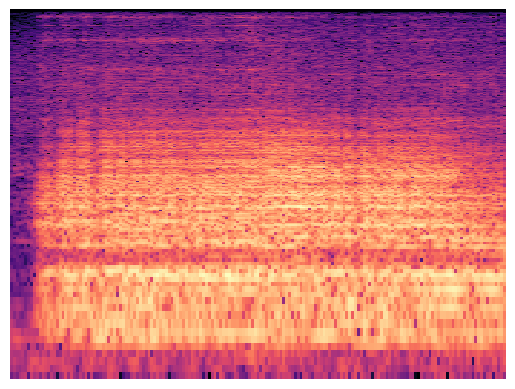

In [21]:
    path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(2,'77751-4-1-0.wav')
    
    y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
    if y.shape != (88200,):
        y = np.resize(y, 88200)
    
    fig, ax = plt.subplots()
    
    D = librosa.stft(y)  # Short Time Fourier Transform (STFT) of y
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    
    img = librosa.display.specshow(S_db, x_axis='time' , y_axis='log', ax = ax)
    plt.axis('off')
    plt.show()

### Plotting Mel-Spectogram Logged Y-Axis

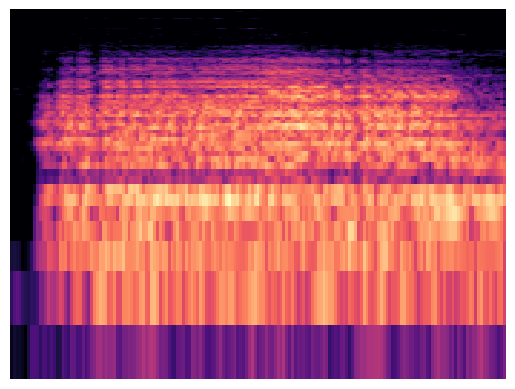

In [34]:
    path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(2,'77751-4-1-0.wav')
    
    y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
    if y.shape != (88200,):
        y = np.resize(y, 88200)
    
    fig, ax = plt.subplots()
    
    S = librosa.feature.melspectrogram(y=y, sr=sr,)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)


    img = librosa.display.specshow(S_db_mel, x_axis='time' , y_axis='log', ax = ax)
    plt.axis('off')
    plt.show()

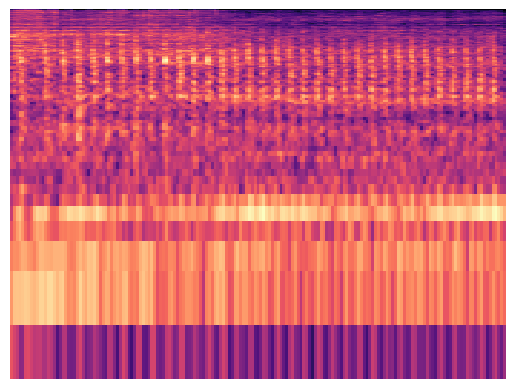

In [35]:
    path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(1,'180937-7-3-0.wav')
    
    y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
    if y.shape != (88200,):
        y = np.resize(y, 88200)
    
    fig, ax = plt.subplots()
    
    S = librosa.feature.melspectrogram(y=y, sr=sr,)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)


    img = librosa.display.specshow(S_db_mel, x_axis='time' , y_axis='log', ax = ax)
    plt.axis('off')
    plt.show()

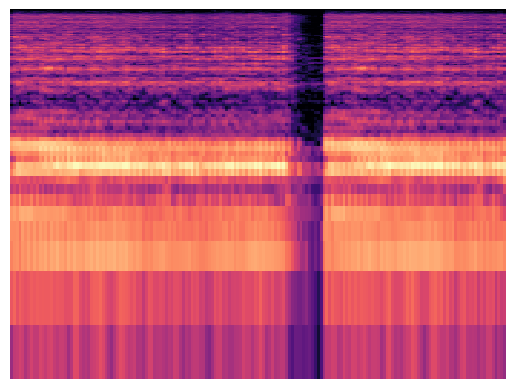

In [30]:
    path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(1,'98223-7-0-0.wav')
    
    y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
    if y.shape != (88200,):
        y = np.resize(y, 88200)
    
    fig, ax = plt.subplots()
    
    S = librosa.feature.melspectrogram(y=y, sr=sr,)
    S_db_mel = librosa.amplitude_to_db(S, ref=np.max)


    img = librosa.display.specshow(S_db_mel, x_axis='time' , y_axis='log', ax = ax)
    plt.axis('off')
    plt.show()

### Previous Spectogram Function (Linear Spectograms)

In [ ]:
# Save train spectograms

for idx, row in train_meta_data.iterrows():
    path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(row['fold'],
                                                                                         row['slice_file_name'])
    y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
    if y.shape != (88200,):
        y = np.resize(y, 88200)
    
    fig, ax = plt.subplots()
    
    D = librosa.stft(y)  # Short Time Fourier Transform (STFT) of y
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    
    img = librosa.display.specshow(S_db, ax = ax)
    
    my_path = 'Source/'
    file_name = row['slice_file_name'][:-4]

    training_path = 'mel_train/{}/'.format(row['classID'])
        
    if not os.path.isdir(my_path + training_path):
        os.makedirs(my_path + training_path)
        
    plt.savefig(my_path + training_path + file_name)
    
    plt.close()

In [ ]:
# Save test spectograms

for idx, row in test_meta_data.iterrows():
    path = 'Source/UrbanSound8K/audio/fold{}/{}'.format(row['fold'],
                                                                                         row['slice_file_name'])
    y, sr = librosa.load(path)
    
    # Standardize the length to 88,200 samples, or 4 seconds
    if y.shape != (88200,):
        y = np.resize(y, 88200)

    
    fig, ax = plt.subplots()
    
    D = librosa.stft(y)  # Short Time Fourier Transform (STFT) of y
    S_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
    
    img = librosa.display.specshow(S_db, ax = ax)
    
    my_path = 'Source/'
    file_name = row['slice_file_name'][:-4]
    
    testing_path = 'mel_test/{}/'.format(row['classID'])
        
    if not os.path.isdir(my_path + testing_path):
        os.makedirs(my_path + testing_path)
        
    plt.savefig(my_path + testing_path + file_name)

    plt.close()